## Erik Bayerlein - 537606

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Optimization Algorithms

#### Auxiliary Algorithms

In [2]:
def MSE_norm(x, y, data):
    return np.sum((x - y)**2)/data.shape[0]

In [3]:
def standard_scaler_norm(y):
    y_mean = np.mean(y)
    y_std = np.std(y)
    return (y - y_mean) / y_std

In [4]:
def min_max_norm(X):
    X_min = np.min(X)
    X_max = np.max(X)
    return (X - X_min) / (X_max - X_min)

In [5]:
def zscore_norm(dataset):
    n = dataset.shape[0]
    mu = 1/n * np.sum(dataset, axis=0)
    sigma = np.sqrt(1/(n-1) * np.sum((dataset - mu)**2, axis=0))
    return (dataset - mu) / sigma

In [281]:
def calc_mse(true, pred):
    return np.sum((true - pred)**2)/true.shape[0]

In [338]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [339]:
def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

In [335]:
def denormalize_output(y_normalized, y_mean, y_std):
    return y_normalized * y_std + y_mean

In [6]:
MSE = lambda y_hat, y, n: (1/n) * np.sum((y - y_hat) ** 2, axis=0)

#### Ordinary Least Squares (OLS)

In [24]:
def ols(
    x: np.ndarray,
    y: np.ndarray,
    data
):
    x = data[:,0].reshape(-1,1)
    y = data[:,1].reshape(-1,1)
    X_b = np.c_[np.ones((len(x))), x]

    w = np.linalg.solve(X_b.T @ X_b, X_b.T @ y )
    y_hat = X_b @ w

    return w, y_hat, X_b

#### Gradient Descent (GD)

In [62]:
def gradient_descent(
    x: np.ndarray,
    y: np.ndarray,
    epochs: int,
    alpha: float = 0.1
):
    w = np.zeros(2)
    mse_history = []

    for epoch in range(epochs):
        error = y - w[0] - w[1] * x
        w[0] += alpha * np.mean(error)
        w[1] += alpha * np.mean(error * x)
        mse_history.append(np.mean(error ** 2))

    return np.array(mse_history), w

#### Stochastic Gradient Descent (SGD)

In [ ]:
def stochastic_gradient_descent(
    X: np.ndarray,
    y: np.ndarray,
    epochs: int,
    alpha: float = 0.1
):
    w = np.zeros((X.shape[1], 1))
    mse_history = []
    for _epoch in range(epochs):
        for i in np.random.permutation(y.shape[0]):
            xi = X[[i]].T
            error = y[i] - w.T @ xi
            w += alpha * error * xi
            mse_history.append(np.mean((y - X @ w) ** 2))
    return mse_history, w

------------

### Q1

#### a) OLS + MSE

In [375]:
data = np.genfromtxt('../../datasets/artificial1d.csv', delimiter=',')

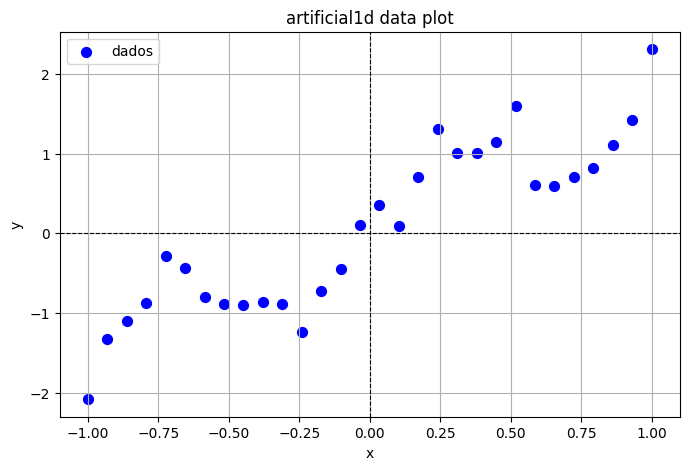

In [372]:
x = data[:,0]
y = data[:,1]

plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", s=50, label="dados")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("artificial1d data plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [373]:
X_normalized = min_max_norm(x)
y_normalized = standard_scaler_norm(y) 

mse_norm = MSE_norm(X_normalized, y_normalized, data)

X = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)

w, y_hat, X_b = ols(X, y, data)


 Parameters:
[[0.06761792]
 [1.57486517]]

 MSE = 0.8033421174596725


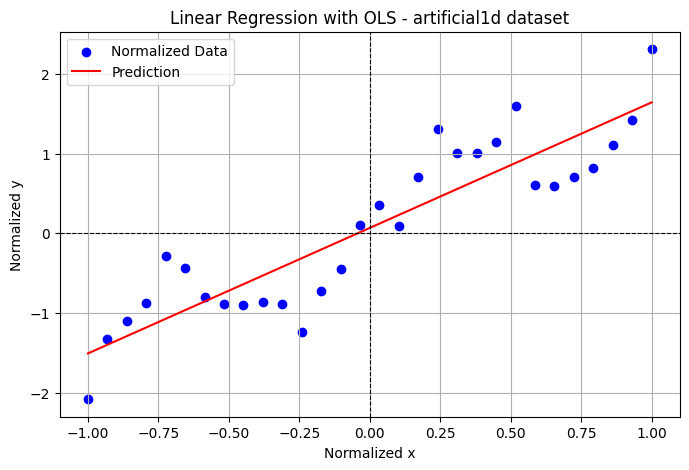

In [374]:
print("\n Parameters:")
print(w)
print(f"\n MSE = {mse_norm}")

plt.figure(figsize=(8,5))
plt.scatter(data[:,0], y, color="blue", label="Normalized Data")
plt.plot(data[:,0], y_hat, color="red", label="Prediction")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Linear Regression with OLS - artificial1d dataset")
plt.xlabel("Normalized x")
plt.ylabel("Normalized y")
plt.legend()
plt.grid(True)
plt.show()

#### b) GD + MSE

In [376]:
data = np.genfromtxt('../../datasets/artificial1d.csv', delimiter=',')

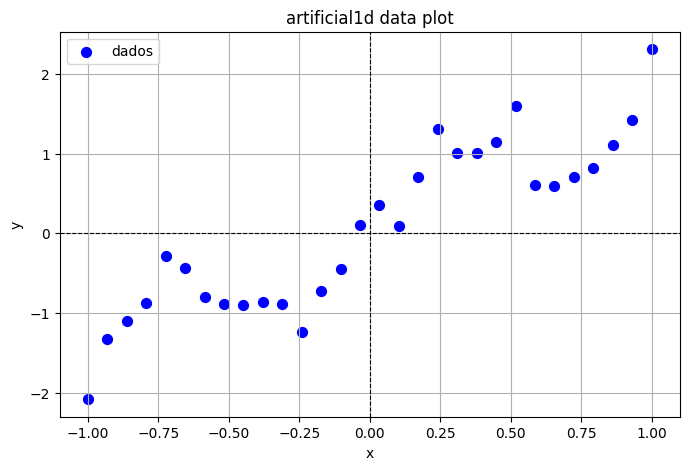

In [377]:
x = data[:,0]
y = data[:,1]

plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", s=50, label="dados")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("artificial1d data plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [378]:
X_normalized = min_max_norm(x)
y_normalized = standard_scaler_norm(y)
mse_hist, w = gradient_descent(X_normalized, y_normalized, epochs=1000, alpha=0.1)

In [379]:
y_mean = np.mean(y)
y_std = np.std(y)
y_hat = w[0] + w[1] * X_normalized
y_hat = y_hat * y_std + y_mean

In [380]:
MSE = np.mean((y_hat - y) ** 2)

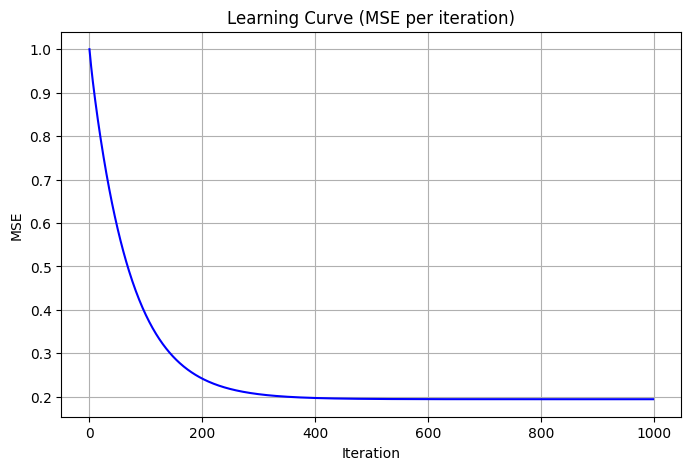

In [382]:
plt.figure(figsize=(8,5))
plt.plot(mse_hist, color="blue")
plt.title("Learning Curve (MSE per iteration)")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

Parameters: [-1.50213651  3.0044678 ]
MSE: 0.21340156212872458


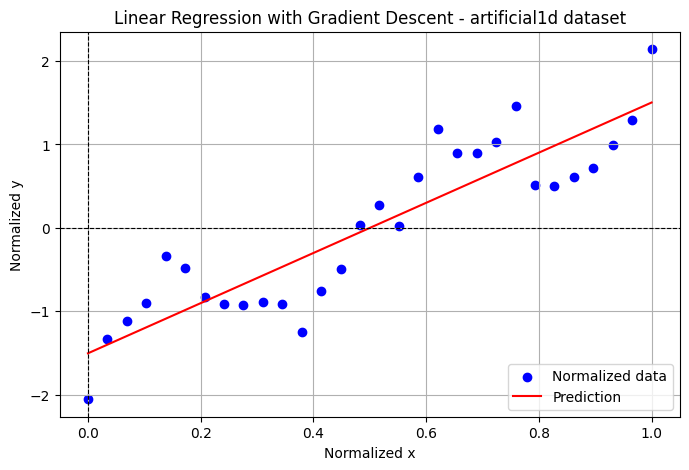

In [383]:
# Resultados
print("Parameters:", w)
print("MSE:", MSE)

plt.figure(figsize=(8,5))
plt.scatter(X_normalized, y_normalized, color="blue", label="Normalized data")
plt.plot(X_normalized, w[0] + w[1] * X_normalized, color="red", label="Prediction")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Linear Regression with Gradient Descent - artificial1d dataset")
plt.xlabel("Normalized x")
plt.ylabel("Normalized y")
plt.legend()
plt.grid(True)
plt.show()

#### c) SGD + MSE

In [384]:
data = np.genfromtxt('../../datasets/artificial1d.csv', delimiter=',')

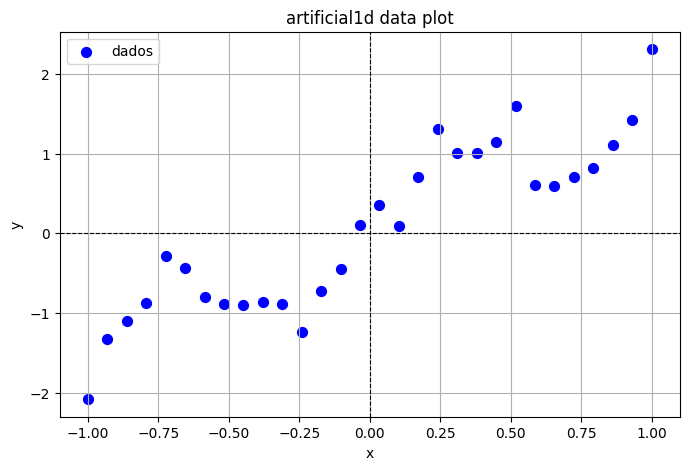

In [385]:
X = data[:, 0]
y = data[:, 1]

plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", s=50, label="dados")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("artificial1d data plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [386]:
X_normalized = min_max_norm(X)
X = np.c_[ np.ones(data.shape[0]), X]

In [387]:
y_original = data[:,[1]]
y_mean = y_original.mean()
y_std = y_original.std()
y = (y_original - y_mean) / y_std

In [388]:
mse_history, w = stochastic_gradient_descent(X, y, 10, 0.1)

In [389]:
y_mean = y_original.mean()
y_std = y_original.std()
pred = X @ w
pred = pred * y_std + y_mean

In [390]:
MSE = calc_mse(y_original, pred)
print(MSE)

0.21693153171876928


Parameters:
[[0.05597427]
 [1.51895794]]
MSE on original data: 0.21693153171876928


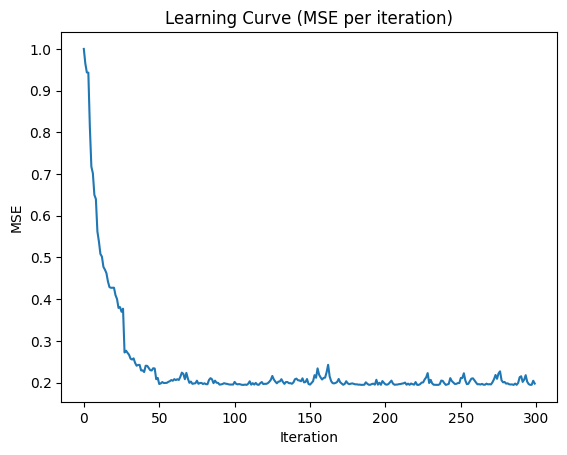

In [392]:
print("Parameters:")
print(w)
print("MSE on original data:", MSE)
plt.plot(mse_history);
plt.xlabel("Iteration");
plt.ylabel("MSE");
plt.title("Learning Curve (MSE per iteration)");

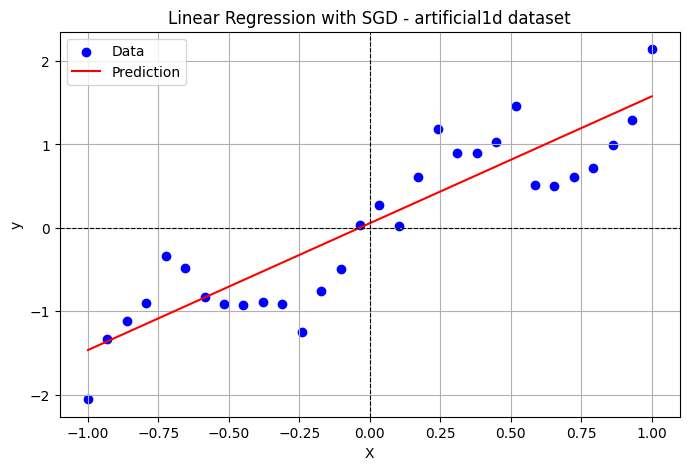

In [393]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", label="Data")
plt.plot(x, w[0] + w[1] * x, color="red", label="Prediction")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Linear Regression with SGD - artificial1d dataset")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### Q2


In [394]:
df = pd.read_csv('../../datasets/california.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,4.1685,20.0,6.700637,1.178344,745.0,2.372611,38.80,-121.15,2.175
1,2.8194,24.0,4.762500,1.020833,608.0,2.533333,36.75,-119.85,0.811
2,2.4250,46.0,4.927711,1.018072,772.0,2.325301,36.33,-119.31,0.849
3,3.1205,16.0,3.728477,1.101545,1260.0,2.781457,33.87,-117.99,1.740
4,4.3889,41.0,5.741007,1.199041,837.0,2.007194,34.15,-118.40,3.804


In [395]:
X = df.values[:, :-1]
y = df.values[:, -1]
len(y), len(X)

(1000, 1000)

#### a) Randomly divide the data set into training (80%) and testing (20%)

In [396]:
def split_train_test(data, test_ratio=0.2):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [397]:
train_set, test_set = split_train_test(df)

In [398]:
X_train = train_set.iloc[:, :-1].values
y_train = train_set.iloc[:, -1].values.reshape(-1, 1)
X_test = test_set.iloc[:, :-1].values
y_test = test_set.iloc[:, -1].values.reshape(-1, 1)

In [399]:
X_min = np.min(X_train, axis=0)
X_max = np.max(X_train, axis=0)
X_train_normalized = (X_train - X_min) / (X_max - X_min)
X_test_normalized = (X_test - X_min) / (X_max - X_min)

In [400]:
y_mean = np.mean(y_train)
y_std = np.std(y_train)
y_train_normalized = (y_train - y_mean) / y_std
y_test_normalized = (y_test - y_mean) / y_std

In [401]:
print("Training set size:", len(X_train_normalized))
print("Test set size:", len(X_test_normalized))

Training set size: 800
Test set size: 200


#### b) Train 13 models in polynomial regression, with orders from 1 to 13. You can use OLS.

In [402]:
def train_polynomial_regression(X_train, y_train, X_test, y_test, degree):
    X_train_poly = np.column_stack([X_train ** i for i in range(1, degree + 1)])
    X_test_poly = np.column_stack([X_test ** i for i in range(1, degree + 1)])
    X_train_poly = add_bias(X_train_poly)
    X_test_poly = add_bias(X_test_poly)

    w = np.linalg.inv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train
    y_train_pred = X_train_poly @ w
    y_test_pred = X_test_poly @ w

    rmse_train = rmse(y_train, y_train_pred)
    rmse_test = rmse(y_test, y_test_pred)
    return rmse_train, rmse_test

In [403]:
for degree in range(1, 14):
    rmse_train, rmse_test = train_polynomial_regression(X_train_normalized, y_train_normalized, X_test_normalized, y_test_normalized, degree)
    print(f'Polynomial regression model of degree {degree}:')
    print(f' RMSE (train): {rmse_train:.4f}')
    print(f' RMSE (test): {rmse_test:.4f}')
    print('-' * 40)

Polynomial regression model of degree 1:
 RMSE (train): 0.5920
 RMSE (test): 0.5720
----------------------------------------
Polynomial regression model of degree 2:
 RMSE (train): 0.5726
 RMSE (test): 0.5525
----------------------------------------
Polynomial regression model of degree 3:
 RMSE (train): 0.5455
 RMSE (test): 0.5686
----------------------------------------
Polynomial regression model of degree 4:
 RMSE (train): 0.5346
 RMSE (test): 0.5798
----------------------------------------
Polynomial regression model of degree 5:
 RMSE (train): 0.5263
 RMSE (test): 0.5684
----------------------------------------
Polynomial regression model of degree 6:
 RMSE (train): 0.5156
 RMSE (test): 0.6240
----------------------------------------
Polynomial regression model of degree 7:
 RMSE (train): 0.5132
 RMSE (test): 0.7854
----------------------------------------
Polynomial regression model of degree 8:
 RMSE (train): 0.5097
 RMSE (test): 1.5884
----------------------------------------


#### c) Report the RMSE (root mean square error) in training and testing for each model. Plot one graph for training and one graph for testing.

In [408]:
degrees = list(range(1, 14))
rmse_train = [0.5920, 0.5726, 0.5455, 0.5346, 0.5278, 0.5263, 0.5156, 0.5132, 0.5097, 0.5070, 0.5038, 0.5105, 0.5177]
rmse_test = [0.5720, 0.5525, 0.5686, 0.5798, 0.9723, 1.5684, 0.6240, 0.7854, 1.5884, 5.0168, 24.8956, 2.2269, 23.5979]

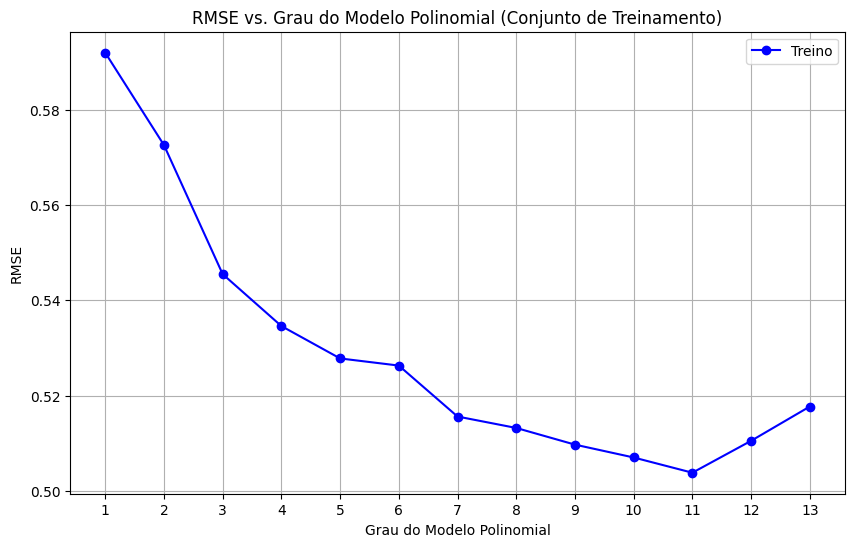

In [409]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, rmse_train, marker='o', color='blue', label='Treino')
plt.title('RMSE vs. Grau do Modelo Polinomial (Conjunto de Treinamento)')
plt.xlabel('Grau do Modelo Polinomial')
plt.ylabel('RMSE')
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()

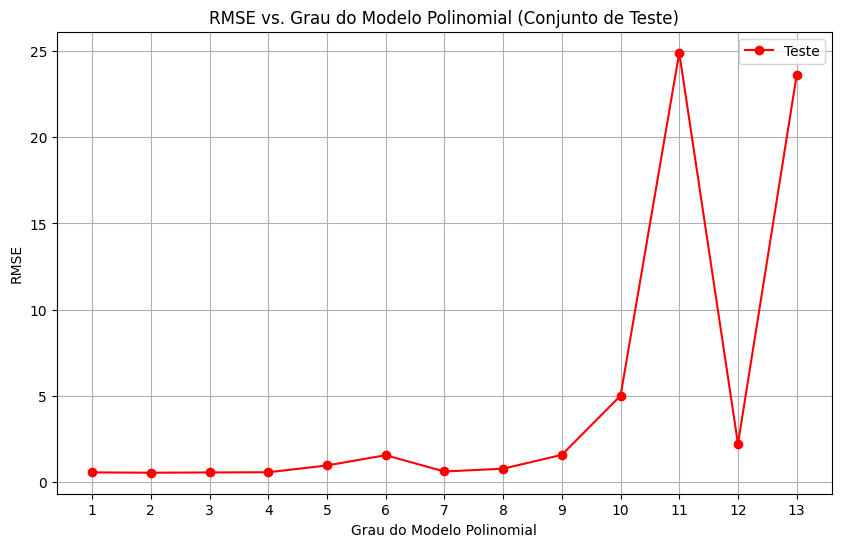

In [410]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, rmse_test, marker='o', color='red', label='Teste')
plt.title('RMSE vs. Grau do Modelo Polinomial (Conjunto de Teste)')
plt.xlabel('Grau do Modelo Polinomial')
plt.ylabel('RMSE')
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()

#### d) Repeat the 2 previous items adding a regularization term L2 (for example, with factor λ= 0.01)

In [411]:
def train_polynomial_regression_l2(X_train, y_train, X_test, y_test, degree, lambda_val):
    X_train_poly = np.column_stack([X_train ** i for i in range(1, degree + 1)])
    X_test_poly = np.column_stack([X_test ** i for i in range(1, degree + 1)])
    X_train_poly = add_bias(X_train_poly)
    X_test_poly = add_bias(X_test_poly)

    I = np.eye(X_train_poly.shape[1])
    I[0, 0] = 0
    w = np.linalg.inv(X_train_poly.T @ X_train_poly + lambda_val * I) @ X_train_poly.T @ y_train

    y_train_pred = X_train_poly @ w
    y_test_pred = X_test_poly @ w

    rmse_train = rmse(y_train, y_train_pred)
    rmse_test = rmse(y_test, y_test_pred)
    return rmse_train, rmse_test

In [ ]:
lambda_val = 0.01
for degree in range(1, 14):
    rmse_train, rmse_test = train_polynomial_regression_l2(X_train_normalized, y_train_normalized, X_test_normalized, y_test_normalized, degree, lambda_val)
    print(f'Degree polynomial regression model with L2 regularization:')
    print(f' RMSE (train): {rmse_train:.4f}')
    print(f' RMSE (test): {rmse_test:.4f}')
    print('-' * 40)

Degree polynomial regression model with L2 regularization:
 RMSE (train): 0.5920
 RMSE (test): 0.5718
----------------------------------------
Degree polynomial regression model with L2 regularization:
 RMSE (train): 0.5728
 RMSE (test): 0.5528
----------------------------------------
Degree polynomial regression model with L2 regularization:
 RMSE (train): 0.5545
 RMSE (test): 0.5575
----------------------------------------
Degree polynomial regression model with L2 regularization:
 RMSE (train): 0.5513
 RMSE (test): 0.5722
----------------------------------------
Degree polynomial regression model with L2 regularization:
 RMSE (train): 0.5505
 RMSE (test): 0.5799
----------------------------------------
Degree polynomial regression model with L2 regularization:
 RMSE (train): 0.5504
 RMSE (test): 0.5771
----------------------------------------
Degree polynomial regression model with L2 regularization:
 RMSE (train): 0.5501
 RMSE (test): 0.5661
----------------------------------------

In [413]:
degrees = range(1, 14)
rmse_train = [0.5920, 0.5728, 0.5545, 0.5513, 0.5505, 0.5504, 0.5501, 0.5492, 0.5479, 0.5465, 0.5453, 0.5443, 0.5435]
rmse_test = [0.5718, 0.5528, 0.5575, 0.5722, 0.5799, 0.5771, 0.5661, 0.5542, 0.5504, 0.5644, 0.6955, 0.6798, 0.7895]

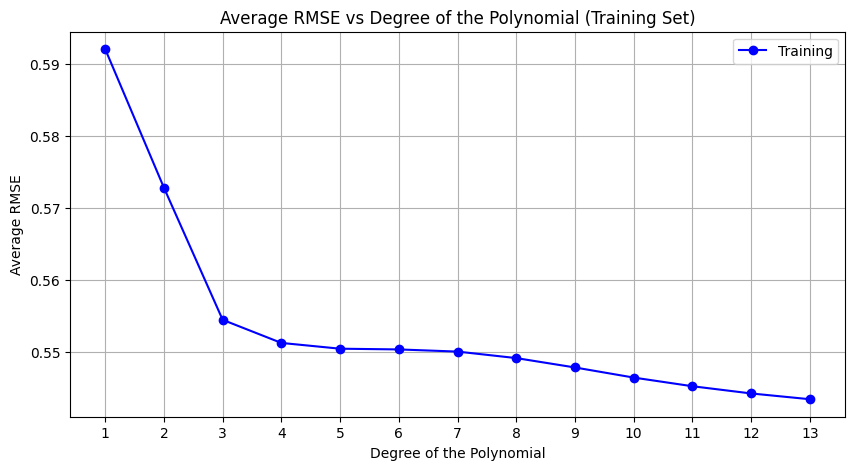

In [414]:
plt.figure(figsize=(10, 5))
plt.plot(degrees, rmse_train, marker='o', color='blue', label='Training')
plt.title('Average RMSE vs Degree of the Polynomial (Training Set)')
plt.xlabel('Degree of the Polynomial')
plt.ylabel('Average RMSE')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

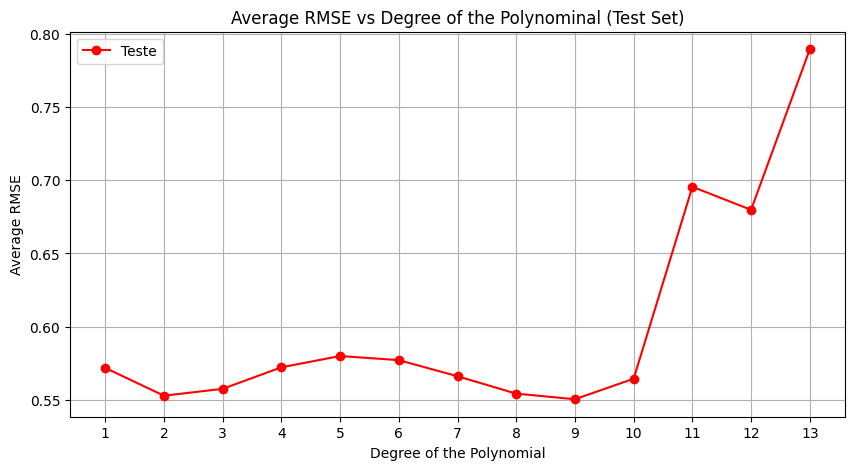

In [415]:
plt.figure(figsize=(10, 5))
plt.plot(degrees, rmse_test, marker='o', color='red', label='Teste')
plt.title('Average RMSE vs Degree of the Polynominal (Test Set)')
plt.xlabel('Degree of the Polynomial')
plt.ylabel('Average RMSE')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()